# Lab11. CNN (Convolutional Newural Network)

### 3. MNIST CNN Class Model

In [1]:
import time
import os

def chk_processting_time(start_time, end_time):
    process_time = end_time - start_time
    p_time = int(process_time)
    p_min = p_time // 60
    p_sec = p_time %  60
    print('처리시간 : {p_min}분 {p_sec}초 경과되었습니다.'.format(
            p_min = p_min, 
            p_sec = p_sec
        ))
    return process_time

In [2]:
! pwd

/c/Users/user/Dropbox/sect_tech/src_anaconda/B_DL_TensorFlow


In [3]:
import sys

sys.path.insert(0, '.')
# sys.path.insert(0, '/c/Users/user/Dropbox/sect_tech/src_anaconda/B_DL_TensorFlow')


In [4]:
import model3

model3.Model Class Load !!


In [5]:
# Lab 11 MNIST and Deep learning CNN
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


### model3.py

### Training

In [6]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# initialize
sess = tf.Session()
m3 = model3.Model(sess, "m3")

sess.run(tf.global_variables_initializer())

print('Learning Started!')
time1 = time.time()

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m3.train(batch_xs, batch_ys)
        avg_cost += c / total_batch
    
    time2 = time.time()
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 'p_time:', time2-time1)

print('Learning Finished!')

time2 = time.time()
chk_processting_time(time1, time2)


Learning Started!
Epoch: 0001 cost = 0.409386985 p_time: 134.49710845947266
Epoch: 0002 cost = 0.099015455 p_time: 254.16158843040466
Epoch: 0003 cost = 0.071885396 p_time: 370.0300889015198
Epoch: 0004 cost = 0.060236892 p_time: 488.0616898536682
Epoch: 0005 cost = 0.051420719 p_time: 604.9710144996643
Epoch: 0006 cost = 0.046388798 p_time: 721.6928362846375
Epoch: 0007 cost = 0.043321362 p_time: 838.2988865375519
Epoch: 0008 cost = 0.037956929 p_time: 953.8224620819092
Epoch: 0009 cost = 0.035131101 p_time: 1070.1848652362823
Epoch: 0010 cost = 0.035707628 p_time: 1186.0911827087402
Epoch: 0011 cost = 0.033047466 p_time: 1301.7190041542053
Epoch: 0012 cost = 0.029357197 p_time: 1417.5279972553253
Epoch: 0013 cost = 0.029322058 p_time: 1533.4525249004364
Epoch: 0014 cost = 0.027239834 p_time: 1649.4491221904755
Epoch: 0015 cost = 0.026158966 p_time: 1765.5224633216858
Learning Finished!
처리시간 : 29분 25초 경과되었습니다.


1765.5234649181366

### Evaluation

In [7]:
# Test model and check accuracy
print('Accuracy:', m3.get_accuracy(mnist.test.images, mnist.test.labels))

Accuracy: 0.9933


### Prediction

Label:  [3]
Prediction:  [[-18.0671711    1.16936672  -6.27596283  22.85437202 -15.81590176
   -0.5126704  -14.62919807  -3.72929239   0.72604579  -2.98613667]]


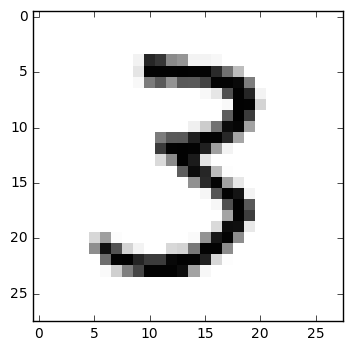

In [10]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", m3.predict(mnist.test.images[r:r + 1]))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()